In [1]:
from google.colab import files
files.upload()

Saving 1.ushape.csv to 1.ushape.csv
Saving 2.concerticcir1.csv to 2.concerticcir1.csv
Saving 3.concertriccir2.csv to 3.concertriccir2.csv
Saving 4.linearsep.csv to 4.linearsep.csv
Saving 5.outlier.csv to 5.outlier.csv
Saving 6.overlap.csv to 6.overlap.csv
Saving 7.xor.csv to 7.xor.csv
Saving 8.twospirals.csv to 8.twospirals.csv
Saving 9.random.csv to 9.random.csv


{'1.ushape.csv': b'3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00\n2.115097840005998098e+00,-4.624396793368001912e-02,1.000000000000000000e+00\n8.824897202429525800e-01,-7.575605515192823658e-02,0.000000000000000000e+00\n-5.514410395493309081e-02,-3.733245922211456125e-02,1.000000000000000000e+00\n8.295450281029342898e-01,-5.393214930366995175e-01,1.000000000000000000e+00\n2.112857076342865792e+00,6.620835334836001618e-01,1.000000000000000000e+00\n5.696926997602634879e-01,3.374413575291368428e-01,0.000000000000000000e+00\n9.521745361967547394e-01,-7.530747091382108405e-01,1.000000000000000000e+00\n-2.922114573667314308e-02,3.928733563262766237e-01,1.000000000000000000e+00\n1.715795573379396366e+00,3.606945394211044098e-01,1.000000000000000000e+00\n-2.788301416383404119e-01,6.142053862138131537e-01,1.000000000000000000e+00\n2.003445086685660126e+00,-3.091496039347518821e-01,1.000000000000000000e+00\n1.500096159481413727e+00,-7.463637596324144141e-01,1.0000000

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors


In [7]:
from matplotlib.colors import ListedColormap



def knn_comparison(data, n_neighbors = 15):
    '''
    This function finds k-NN and plots the data.
    '''
    X = data[:, :2]
    y = data[:,2] 
    
    
    # grid cell size
    h = .02
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])


    # the core classifier: k-NN
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # we create a mesh grid (x_min,y_min) to (x_max y_max) with 0.02 grid spaces
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # we predict the value (either 0 or 1) of each element in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # xx.ravel() will give a flatten array

    # np.c_ : Translates slice objects to concatenation along the second axis.
    # > np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # > array([[1, 4],
    #          [2, 5],
    #          [3, 6]])   (source: np.c_ documentation)
    
    
    
    
    # convert the out back to the xx shape (we need it to plot the decission boundry)
    Z = Z.reshape(xx.shape)
    
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
   
    # scatter plot of with given points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(n_neighbors))
    

    plt.show()

### Meshgrid explanation
![title](demo_data/meshgrid_image.png)
please check this link <a href='https://stackoverflow.com/a/36014586'> stackoverflow meshgrid explanation </a>

In [5]:
%ls

1.ushape.csv          4.linearsep.csv  7.xor.csv         sample_data/
2.concerticcir1.csv   5.outlier.csv    8.twospirals.csv
3.concertriccir2.csv  6.overlap.csv    9.random.csv


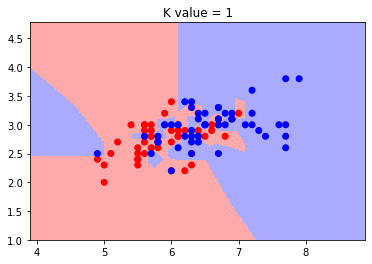

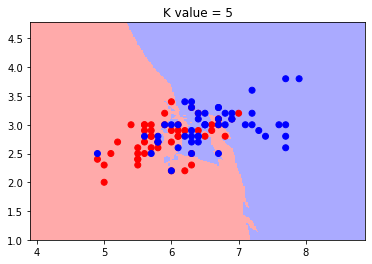

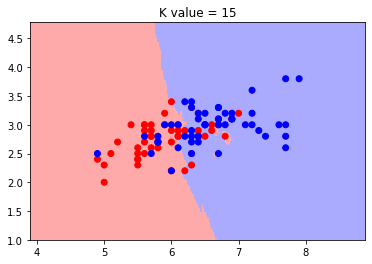

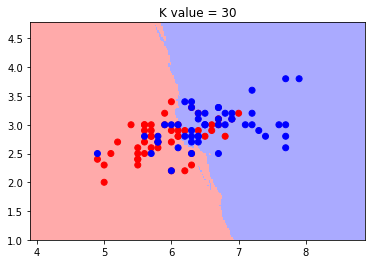

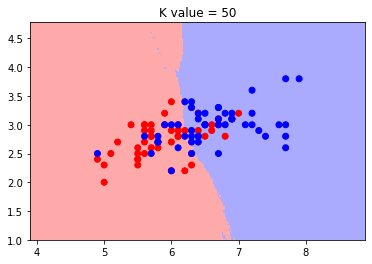

In [9]:
data = np.genfromtxt('6.overlap.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data, 30)
knn_comparison(data, 50)


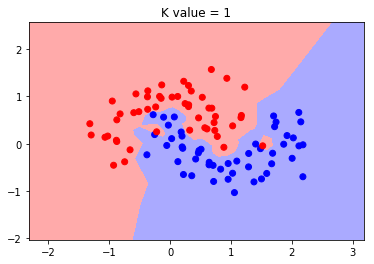

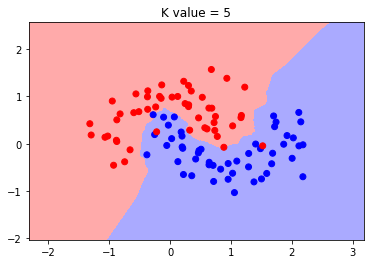

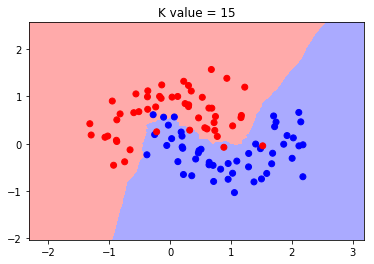

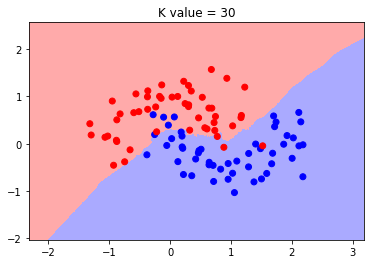

In [ ]:
data = np.genfromtxt('demo_data/1.ushape.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data,30)


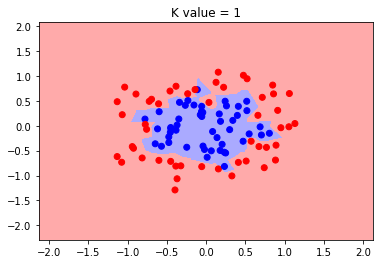

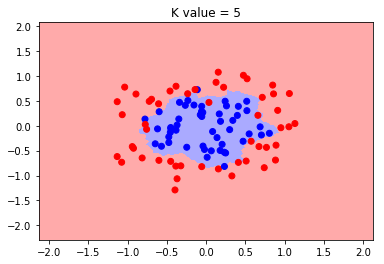

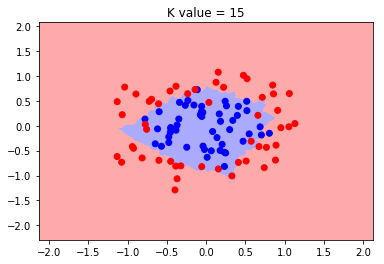

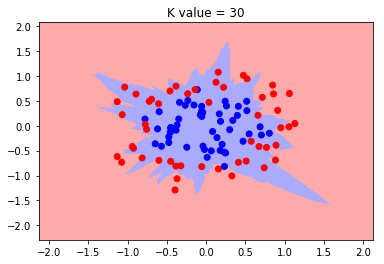

In [ ]:
data = np.genfromtxt('demo_data/2.concerticcir1.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data,30)

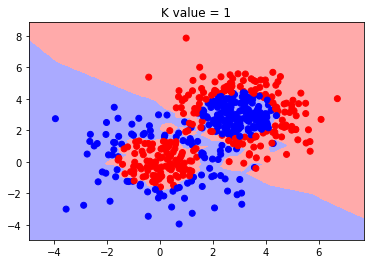

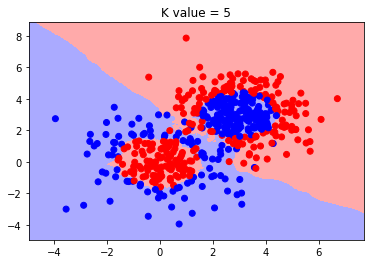

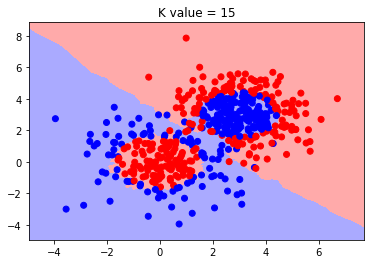

In [ ]:
data = np.genfromtxt('demo_data/3.concertriccir2.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)

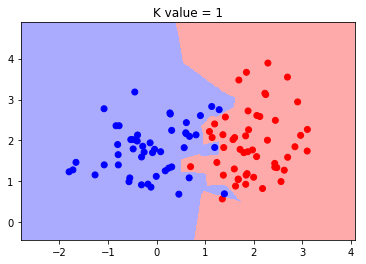

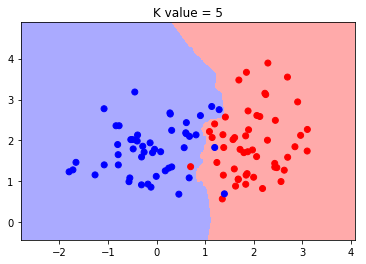

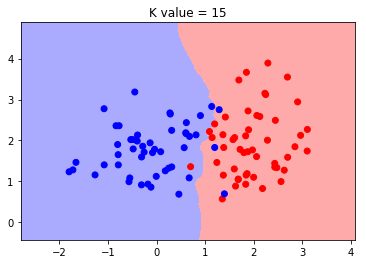

In [ ]:
data = np.genfromtxt('demo_data/4.linearsep.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data)

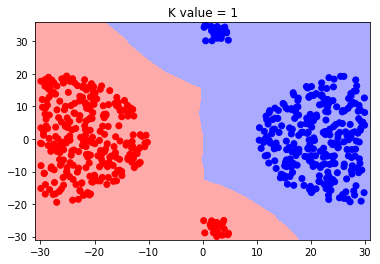

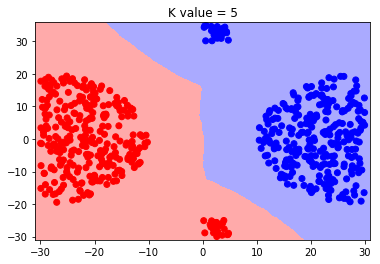

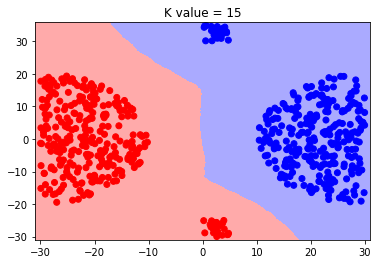

In [ ]:
data = np.genfromtxt('demo_data/5.outlier.csv', delimiter=',')
knn_comparison(data,1)
knn_comparison(data,5)
knn_comparison(data)

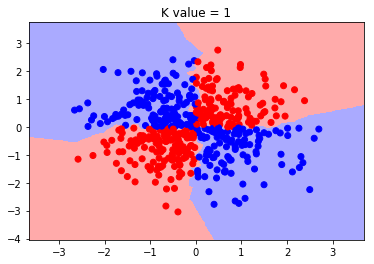

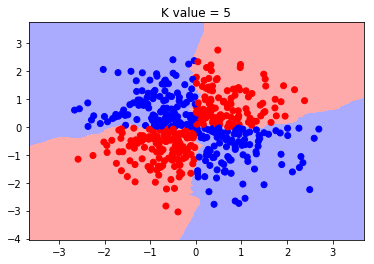

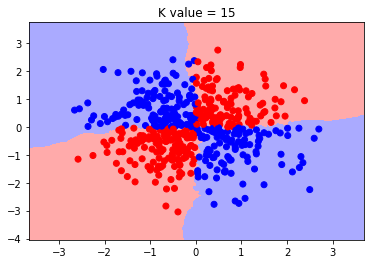

In [ ]:
data = np.genfromtxt('demo_data/7.xor.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data)

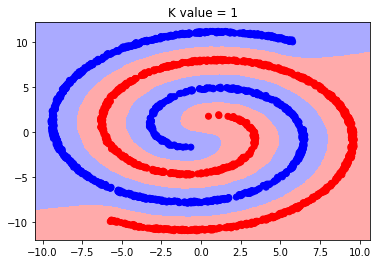

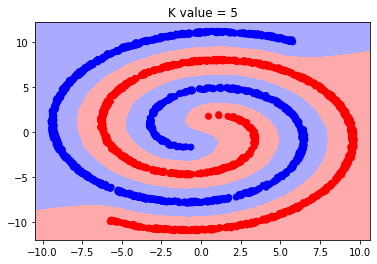

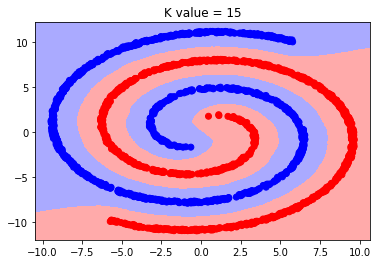

In [10]:
data = np.genfromtxt('8.twospirals.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data)

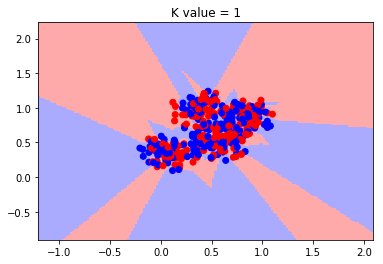

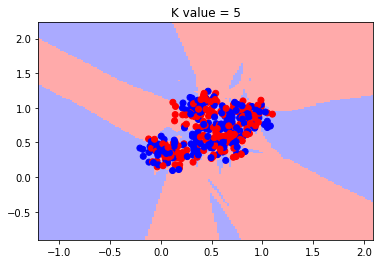

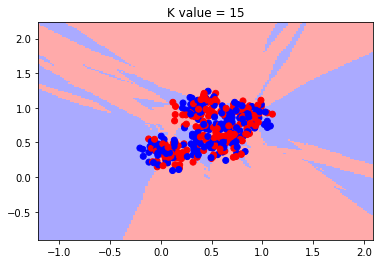

In [ ]:
data = np.genfromtxt('demo_data/9.random.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data)
